In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

print("Libraries imported successfully")

Libraries imported successfully


In [4]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**Create Target Classes**

In [6]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df['quality_label'].value_counts()


quality_label
0    984
1    159
Name: count, dtype: int64

*Wine quality scores were converted into binary classes for classification.*

**Feature Selection**

In [8]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


*Chemical attributes were selected as input features, and quality label as the target variable.*

**Train-Test Split**

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Feature Scaling**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*Feature scaling was applied to normalize the data for improved model performance.*

**Train Classifier Models**

**1️) Random Forest Classifier**

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


**2) SGD Classifier**

In [17]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)


**3) Support Vector Classifier (SVC)**

In [18]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)


**Model Evaluation**

In [19]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))


Random Forest Accuracy: 0.9344978165938864
SGD Accuracy: 0.834061135371179
SVC Accuracy: 0.8995633187772926


**Classification Report**

In [24]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229



*Model performance was evaluated using accuracy and classification metrics.*

**Visualization**

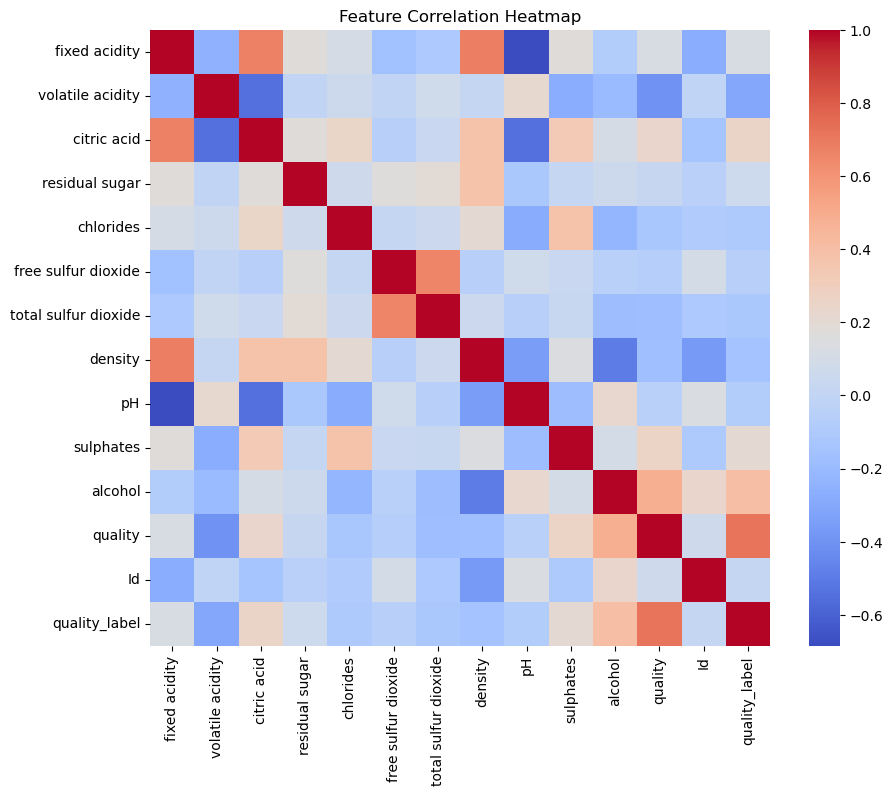

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Confusion Matrix (Random Forest)**

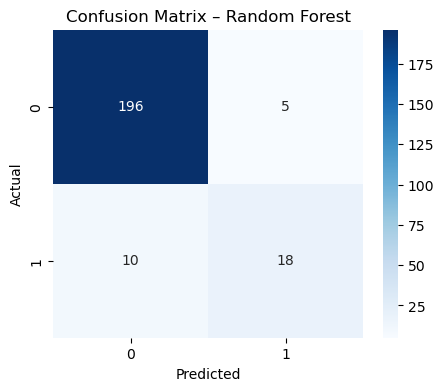

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Conclusion:**
Wine quality was successfully predicted using chemical attributes. Among the tested classifiers, Random Forest demonstrated the best performance, highlighting the effectiveness of ensemble learning for classification tasks.